# Making Graphs for Prospectus Presentation

In [112]:
import pandas as pd
import os

#Set working directory
os.chdir("/Users/teri/Documents/GitHub/Interconnection")

que = pd.read_excel("queues_2023_clean_data_r1.xlsx")

In [113]:
# Filter only to include solar 

renque = que[(que["type_clean"] == 'Solar')]

south_west = ["CA", "NM", "AZ", "TX", "NV"]
renque = renque[(renque["state"].isin(south_west))]
# | (que["type_clean"] == 'Solar+Battery')

Local Elections

In [114]:
## Local Elections

local_data = pd.read_csv("ledb_candidatelevel.csv")

In [115]:
local = local_data.drop(columns=["contributor.cfscore",	"bonica.cid", "prob_other", "prob_female", 'prob_male', "gender_est", "prob_black", "prob_white", "prob_hispanic", "prob_asian", "race_est", "ballotpedia_url"])

In [116]:

countyleg = local[(local['office_consolidated'] == "County Legislature") & (local['winner'] == "win" ) ]

countyex = local[(local['office_consolidated'] == "County Legislature") & (local['winner'] == "win" ) ]
#& (local['winner'] == "win" )

In [117]:
countyleg.sort_values(by=["state_abb","geo_name", "year"]).head(36)

countyleg.to_csv("counylegex.csv")

In [118]:
# Checking if an election occurred 

import numpy as np

# Group by county, year, and month
collapsed = countyleg.groupby(["state_abb", 'geo_name', 'year', 'month']).agg(
    election=('year', lambda x: 1 if len(x) > 0 else 0),  # Check if there was an election
    member_change=('incumbent', lambda x: 1 if (x == 0).any() else (np.nan if x.isna().all() else 0)) 
).reset_index()

## Matching Datasets 



In [119]:
# Extracting the year when the project entered the que

renque['q_date'] = pd.to_datetime(renque['q_date'],  format='mixed', errors='coerce')
renque['year'] = renque['q_date'].dt.year


que_elec = renque.merge(
    collapsed,
    how="left",
    left_on=['state', 'county_1', 'year'],
    right_on=['state_abb', 'geo_name', 'year']
)




In [120]:
# Drop rows where 'year' is NaN
que_elec = que_elec[~que_elec['year'].isna()]
# Convert 'year' to integer
que_elec['year'] = que_elec['year'].astype(int)
# Filter out rows from 2021 onwards
que_elec = que_elec[que_elec['year'] < 2021]


## Regressions

In [121]:
## Replacing NAs with 0 

que_elec['election'] = que_elec['election'].fillna(0)
que_elec['member_change'] = que_elec['member_change'].fillna(0)

# Drop observations from 2021 onwards as i do not have election data for those years 
# Ensure the 'year' column is of integer type
que_elec['year'] = que_elec['year'].astype(int)

# Filter out rows where the year is 2021 or later
que_elec_filtered = que_elec[que_elec['year'] < 2021]



que_elec.head(10)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,...,type3,mw1,mw2,mw3,year,state_abb,geo_name,month,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,50.0,NaN,NaN,2011,NaN,NaN,NaN,0.0,0.0
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,15.0,NaN,NaN,2011,NaN,NaN,NaN,0.0,0.0
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,20.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,20.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,20.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0
6,Q111,withdrawn,2010-03-22,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,30.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0
7,Q184,withdrawn,2010-12-23,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,300.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0
8,Q80,withdrawn,2009-11-25,2009.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,100.0,NaN,NaN,2009,NaN,NaN,NaN,0.0,0.0
9,Q186,withdrawn,2011-01-27,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,16.0,NaN,NaN,2011,NaN,NaN,NaN,0.0,0.0
10,Q93,withdrawn,2010-01-21,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,20.0,NaN,NaN,2010,NaN,NaN,NaN,0.0,0.0


## By Month and Year

In [122]:
## Observations with applications in election years 
que_elec_yr = renque.merge(
    collapsed,
    how="inner",
    left_on=['state', 'county_1', 'year'],
    right_on=['state_abb', 'geo_name', 'year']
)

que_elec_yr.shape[0]

721

In [123]:
# Ensure 'q_date' is a datetime object
que_elec_yr['q_date'] = pd.to_datetime(que_elec_yr['q_date'])

# Extract the application month
que_elec_yr['application_month'] = que_elec_yr['q_date'].dt.month

# Calculate the difference in months from the election month
que_elec_yr['months_from_election'] = que_elec_yr['application_month'] - que_elec_yr['month']

# Group by months_from_election and count applications
applications_by_month = que_elec_yr.groupby('months_from_election').size().reset_index(name='application_count')

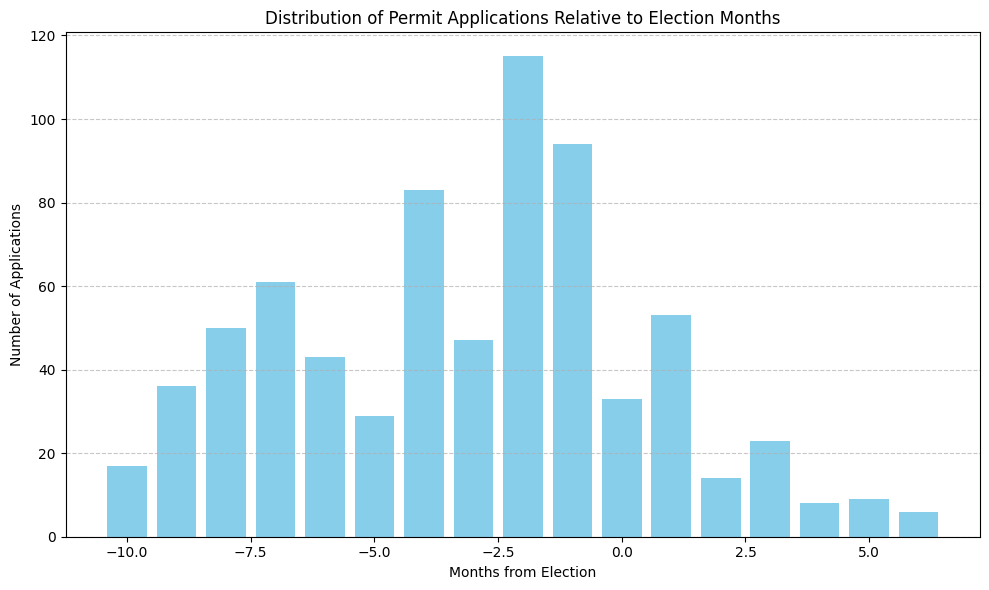

In [124]:
import matplotlib.pyplot as plt
# Plot the distribution of applications by months from the election
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [125]:
# Step 1: Extract unique state and county combinations
unique_state_county = collapsed[['state_abb', 'geo_name']].drop_duplicates().reset_index(drop=True)
unique_state_county.columns = ['state', 'county']

# Step 2: Create a base DataFrame with all combinations of years and months
years = range(2000, 2021)  # Years from 2000 to 2020
months = range(1, 13)  # Months from 1 to 12
base_data = [(year, month) for year in years for month in months]
base_df = pd.DataFrame(base_data, columns=['year', 'month'])

# Step 3: Perform a cross join to replicate year-month rows for each state-county pair
election_empty = unique_state_county.merge(base_df, how='cross')

# Step 4: Add empty columns for election-related information if needed
election_empty['election_months_away'] = None

# Display the resulting DataFrame
election_empty.shape[0]

146916

In [126]:

election_panel = election_empty.merge(
    collapsed,
    how="outer",
    left_on=['state', 'county', 'year', 'month'],
    right_on=['state_abb', 'geo_name', 'year', 'month']
)



In [127]:
# Ensure 'month' in collapsed is an integer
collapsed['month'] = collapsed['month'].astype(int)

# Create the 'election_date' column in collapsed
collapsed['election_date'] = pd.to_datetime(
    collapsed['year'].astype(str) + '-' + collapsed['month'].astype(str) + '-01'
)

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year, election_month):
    return (application_year - election_year) * 12 + (application_month - election_month)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year = county_data['year']
    election_month = county_data['month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year, election_month),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']


In [128]:
# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month.head()

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,...,mw3,year,q_month,county,month,election_months_away,state_abb,geo_name,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,2011.0,1.0,san juan,1.0,2.0,NaN,NaN,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,2011.0,10.0,yavapai,10.0,None,NaN,NaN,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,2010.0,4.0,maricopa,4.0,None,NaN,NaN,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,2010.0,3.0,maricopa,3.0,None,NaN,NaN,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,NaN,2010.0,3.0,maricopa,3.0,None,NaN,NaN,NaN,NaN


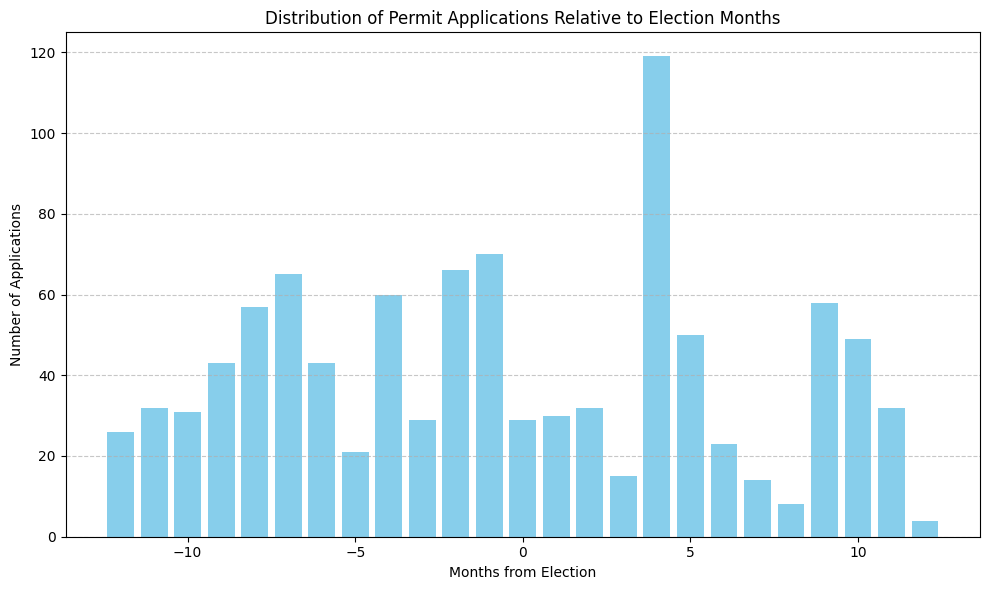

In [129]:
# Calculate applications by months from the election
applications_by_month = que_elec_month['election_months_away'].value_counts().reset_index()
applications_by_month.columns = ['months_from_election', 'application_count']
applications_by_month = applications_by_month.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Lagged

In [130]:
# Create a lagged election year for analysis
collapsed['lagged_election_year'] = collapsed['year'] + 1
collapsed['lagged_election_month'] = collapsed['month']


collapsed_lagged = collapsed.drop(columns=["year","month"])
collapsed_lagged.head(10)

,state_abb,geo_name,election,member_change,election_date,lagged_election_year,lagged_election_month
0,AK,anchorage,1,NaN,2016-11-01,2017,11
1,AL,baldwin,1,NaN,2000-11-01,2001,11
2,AL,baldwin,1,1.0,2004-11-01,2005,11
3,AL,baldwin,1,1.0,2006-11-01,2007,11
4,AL,baldwin,1,1.0,2010-11-01,2011,11
5,AL,baldwin,1,1.0,2014-11-01,2015,11
6,AL,baldwin,1,1.0,2018-11-01,2019,11
7,AL,calhoun,1,NaN,2018-11-01,2019,11
8,AL,etowah,1,NaN,2016-11-01,2017,11
9,AL,etowah,1,NaN,2018-11-01,2019,11


In [131]:


# Create the 'election_date' column in collapsed
#collapsed_lagged['election_date'] = pd.to_datetime(
#    collapsed_lagged['lagged_election_year'].astype(str) + '-' + collapsed_lagged['lagged_election_month'].astype(str) + '-01'
#)

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year_lag, election_month_lag):
    return (application_year - election_year_lag) * 12 + (application_month - election_month_lag)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed_lagged.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year_lag = county_data['lagged_election_year']
    election_month_lag = county_data['lagged_election_month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year_lag, election_month_lag) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year_lag, election_month_lag) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year_lag, election_month_lag),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']

In [132]:
# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month_lagged = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'q_year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month_lagged.head(20)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,...,year_x,q_month,county,year_y,month,election_months_away,state_abb,geo_name,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,1.0,san juan,2011,1.0,-10.0,NaN,NaN,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,10.0,yavapai,2011,10.0,None,NaN,NaN,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,4.0,maricopa,2010,4.0,5.0,NaN,NaN,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
5,Q111,withdrawn,2010-03-22,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
6,Q184,withdrawn,2010-12-23,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,12.0,maricopa,2010,12.0,None,NaN,NaN,NaN,NaN
7,Q186,withdrawn,2011-01-27,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,1.0,yuma,2011,1.0,None,NaN,NaN,NaN,NaN
8,Q93,withdrawn,2010-01-21,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,1.0,maricopa,2010,1.0,2.0,NaN,NaN,NaN,NaN
9,Q60,withdrawn,2008-12-31,2008.0,NaN,NaN,NaN,APS,NaN,NaN,...,2008.0,12.0,yuma,2008,12.0,-11.0,NaN,NaN,NaN,NaN


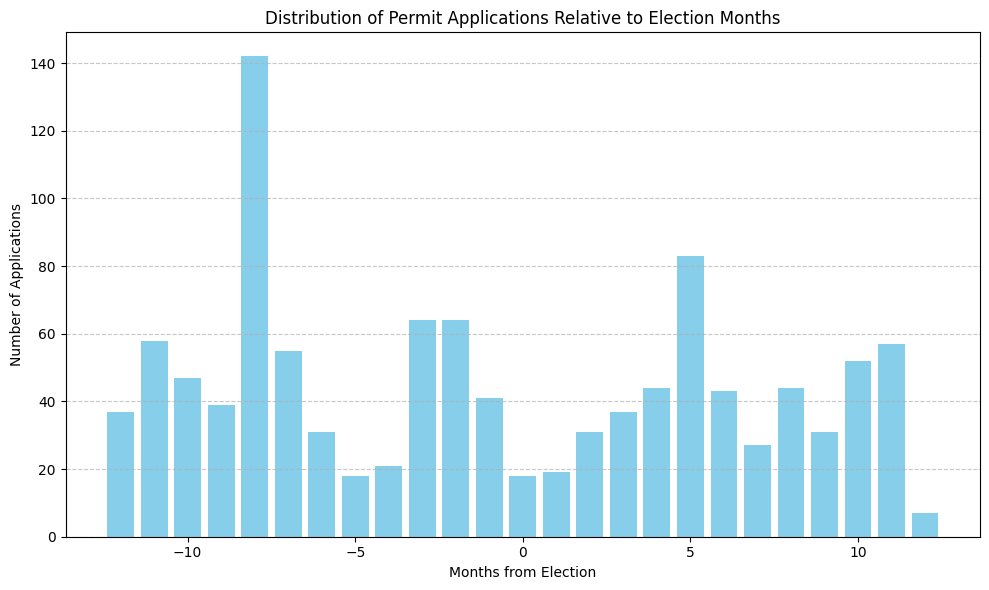

In [133]:
applications_by_month_lagged = que_elec_month_lagged['election_months_away'].value_counts().reset_index()
applications_by_month_lagged.columns = ['months_from_election', 'application_count']
applications_by_month_lagged = applications_by_month_lagged.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month_lagged['months_from_election'], applications_by_month_lagged['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

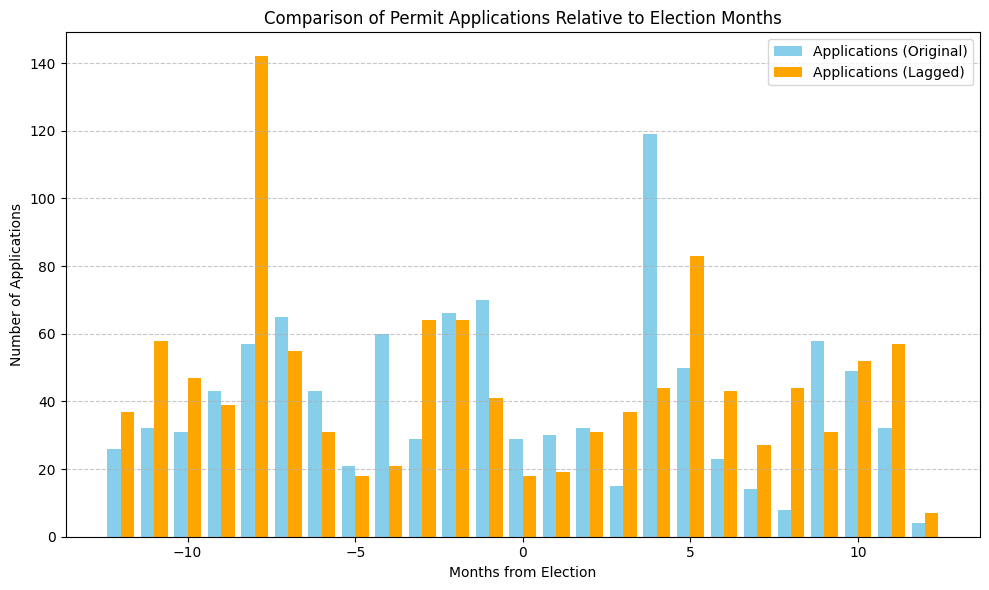

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate applications by months from the election
applications_by_month = que_elec_month['election_months_away'].value_counts().reset_index()
applications_by_month.columns = ['months_from_election', 'application_count']
applications_by_month = applications_by_month.sort_values('months_from_election')

applications_by_month_lagged = que_elec_month_lagged['election_months_away'].value_counts().reset_index()
applications_by_month_lagged.columns = ['months_from_election', 'application_count']
applications_by_month_lagged = applications_by_month_lagged.sort_values('months_from_election')

# Define bar width and offsets for overlaying bars
bar_width = 0.4
x1 = np.array(applications_by_month['months_from_election'])
x2 = np.array(applications_by_month_lagged['months_from_election'])

plt.figure(figsize=(10, 6))

# Plot first dataset (original applications)
plt.bar(x1 - bar_width/2, applications_by_month['application_count'], 
        width=bar_width, label='Applications (Original)', color='skyblue')

# Plot second dataset (lagged applications)
plt.bar(x2 + bar_width/2, applications_by_month_lagged['application_count'], 
        width=bar_width, label='Applications (Lagged)', color='orange')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Comparison of Permit Applications Relative to Election Months')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


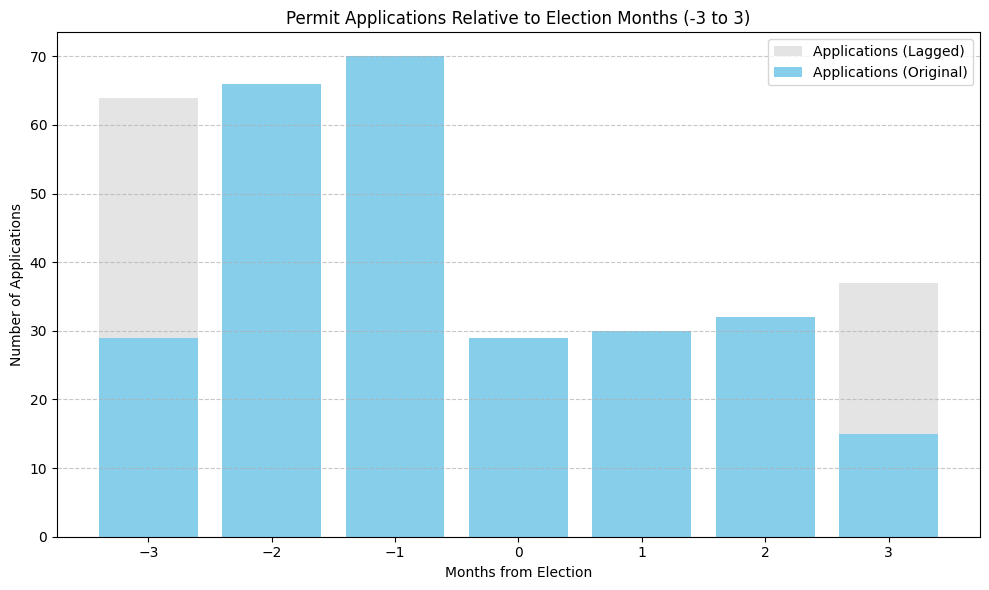

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data to only include -3 to 3 months
filtered_applications = applications_by_month[
    (applications_by_month['months_from_election'] >= -3) & 
    (applications_by_month['months_from_election'] <= 3)
]

filtered_applications_lagged = applications_by_month_lagged[
    (applications_by_month_lagged['months_from_election'] >= -3) & 
    (applications_by_month_lagged['months_from_election'] <= 3)
]

# Define x values
x1 = np.array(filtered_applications['months_from_election'])
x2 = np.array(filtered_applications_lagged['months_from_election'])

plt.figure(figsize=(10, 6))

# Plot the shaded background histogram (lagged applications)
plt.bar(x2, filtered_applications_lagged['application_count'], 
        color='lightgray', alpha=0.6, label='Applications (Lagged)')

# Overlay the main bar chart (original applications)
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', label='Applications (Original)')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months (-3 to 3)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


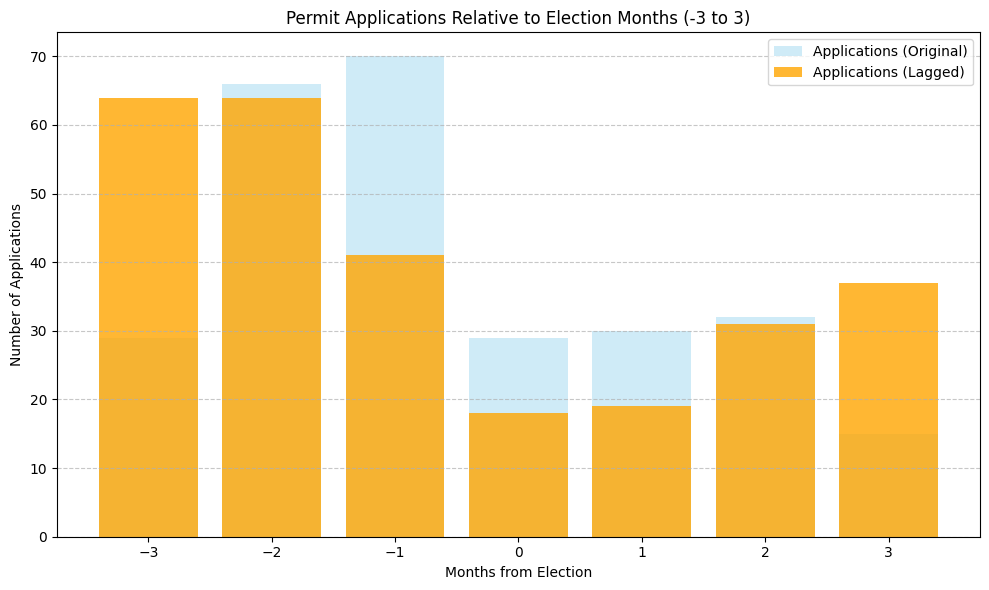

In [136]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot the original applications as a shaded background
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', alpha=0.4, label='Applications (Original)')

# Overlay the main bar chart (lagged applications) on top
plt.bar(x2, filtered_applications_lagged['application_count'], 
        color='orange', alpha=0.8, label='Applications (Lagged)')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months (-3 to 3)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


## Lead 

In [137]:
# Create a lagged election year for analysis
collapsed['lead_election_year'] = collapsed['year'] - 1
collapsed['lead_election_month'] = collapsed['month']


collapsed_lead = collapsed.drop(columns=["year","month"])
collapsed_lead.head(10)

,state_abb,geo_name,election,member_change,election_date,lagged_election_year,lagged_election_month,lead_election_year,lead_election_month
0,AK,anchorage,1,NaN,2016-11-01,2017,11,2015,11
1,AL,baldwin,1,NaN,2000-11-01,2001,11,1999,11
2,AL,baldwin,1,1.0,2004-11-01,2005,11,2003,11
3,AL,baldwin,1,1.0,2006-11-01,2007,11,2005,11
4,AL,baldwin,1,1.0,2010-11-01,2011,11,2009,11
5,AL,baldwin,1,1.0,2014-11-01,2015,11,2013,11
6,AL,baldwin,1,1.0,2018-11-01,2019,11,2017,11
7,AL,calhoun,1,NaN,2018-11-01,2019,11,2017,11
8,AL,etowah,1,NaN,2016-11-01,2017,11,2015,11
9,AL,etowah,1,NaN,2018-11-01,2019,11,2017,11


In [138]:


# Create the 'election_date' column in collapsed
#collapsed_lagged['election_date'] = pd.to_datetime(
#    collapsed_lagged['lagged_election_year'].astype(str) + '-' + collapsed_lagged['lagged_election_month'].astype(str) + '-01'
#)

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year_lead, election_month_lead):
    return (application_year - election_year_lead) * 12 + (application_month - election_month_lead)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed_lead.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year_lead = county_data['lead_election_year']
    election_month_lead = county_data['lead_election_month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year_lead, election_month_lead) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year_lead, election_month_lead) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year_lead, election_month_lead),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']

In [139]:
# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month_lead = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'q_year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month_lead.head(20)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,...,year_x,q_month,county,year_y,month,election_months_away,state_abb,geo_name,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,1.0,san juan,2011,1.0,-10.0,NaN,NaN,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,10.0,yavapai,2011,10.0,-1.0,NaN,NaN,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,4.0,maricopa,2010,4.0,5.0,NaN,NaN,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
5,Q111,withdrawn,2010-03-22,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
6,Q184,withdrawn,2010-12-23,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,12.0,maricopa,2010,12.0,-11.0,NaN,NaN,NaN,NaN
7,Q186,withdrawn,2011-01-27,2011.0,NaN,NaN,NaN,APS,NaN,NaN,...,2011.0,1.0,yuma,2011,1.0,-10.0,NaN,NaN,NaN,NaN
8,Q93,withdrawn,2010-01-21,2010.0,NaN,NaN,NaN,APS,NaN,NaN,...,2010.0,1.0,maricopa,2010,1.0,2.0,NaN,NaN,NaN,NaN
9,Q60,withdrawn,2008-12-31,2008.0,NaN,NaN,NaN,APS,NaN,NaN,...,2008.0,12.0,yuma,2008,12.0,-11.0,NaN,NaN,NaN,NaN


In [140]:
south_west = ["CA", "NM", "AZ", "TX", "NV"]
que_elec_month_lead = que_elec_month_lead.loc[que_elec_month_lead["state"].isin(south_west), ]
len(que_elec_month_lead)

1194

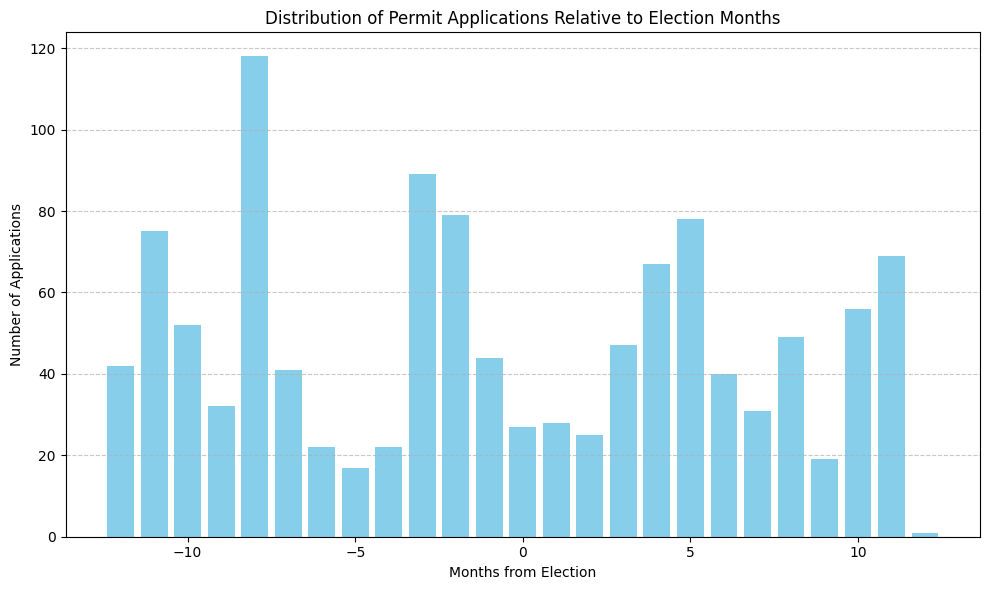

In [141]:
applications_by_month_lead = que_elec_month_lead['election_months_away'].value_counts().reset_index()
applications_by_month_lead.columns = ['months_from_election', 'application_count']
applications_by_month_lead = applications_by_month_lead.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month_lead['months_from_election'], applications_by_month_lead['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

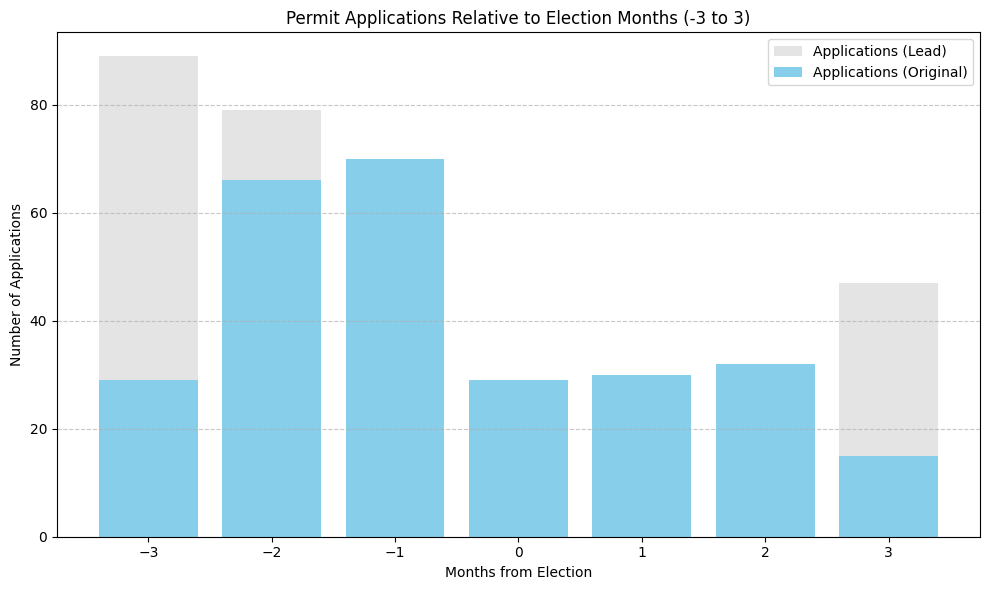

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data to only include -3 to 3 months
filtered_applications = applications_by_month[
    (applications_by_month['months_from_election'] >= -3) & 
    (applications_by_month['months_from_election'] <= 3)
]

filtered_applications_lead = applications_by_month_lead[
    (applications_by_month_lead['months_from_election'] >= -3) & 
    (applications_by_month_lead['months_from_election'] <= 3)
]

# Define x values
x1 = np.array(filtered_applications['months_from_election'])
x2 = np.array(filtered_applications_lead['months_from_election'])

plt.figure(figsize=(10, 6))

# Plot the shaded background histogram (lagged applications)
plt.bar(x2, filtered_applications_lead['application_count'], 
        color='lightgray', alpha=0.6, label='Applications (Lead)')

# Overlay the main bar chart (original applications)
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', label='Applications (Original)')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months (-3 to 3)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


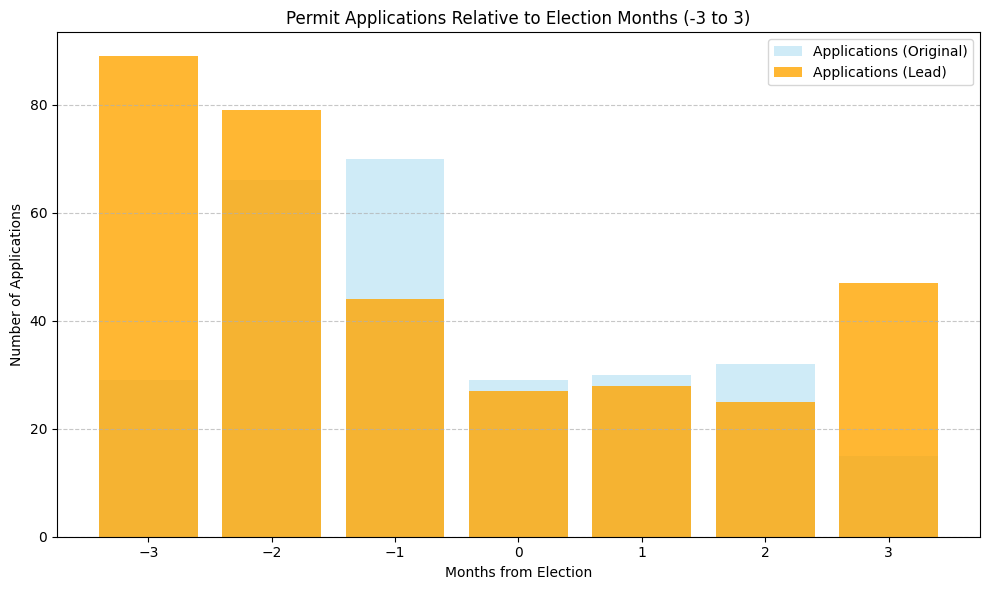

In [143]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

# Plot the original applications as a shaded background
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', alpha=0.4, label='Applications (Original)')

# Overlay the main bar chart (lead applications) on top
plt.bar(x2, filtered_applications_lead['application_count'], 
        color='orange', alpha=0.8, label='Applications (Lead)')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months (-3 to 3)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


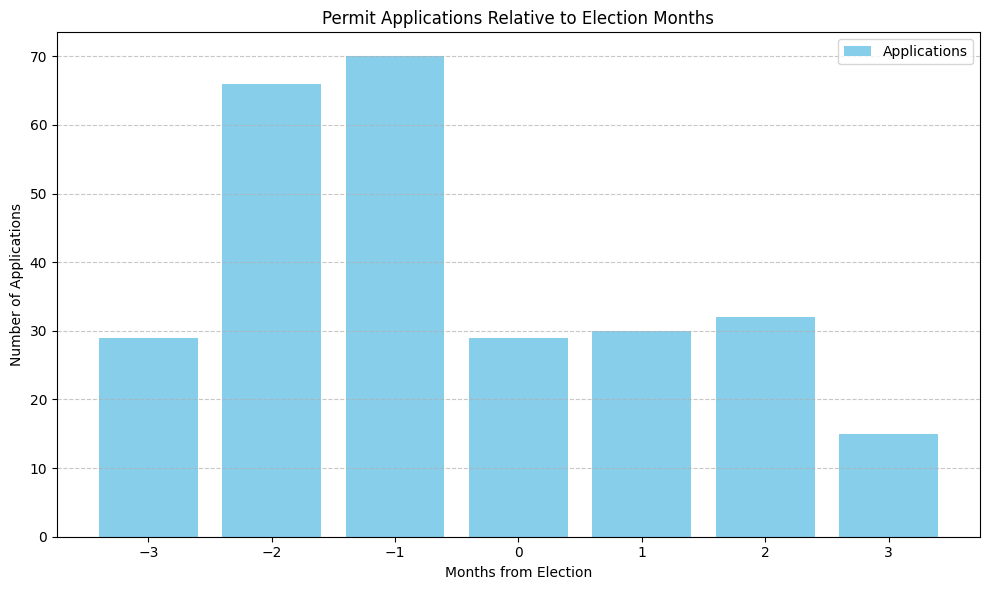

<Figure size 640x480 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data to only include -3 to 3 months
filtered_applications = applications_by_month[
    (applications_by_month['months_from_election'] >= -3) & 
    (applications_by_month['months_from_election'] <= 3)
]


# Define x values
x1 = np.array(filtered_applications['months_from_election'])

plt.figure(figsize=(10, 6))


# Overlay the main bar chart (original applications)
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', label='Applications')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('applications_election_months.png') 


## Off Years

In [145]:
# Merge the lead and lagged datasets on 'months_from_election'
off_years_avg = pd.merge(
    filtered_applications_lead, 
    filtered_applications_lagged, 
    on='months_from_election', 
    suffixes=('_lead', '_lagged')
)

# Calculate the mean of lead and lagged applications
off_years_avg['application_count_off_years'] = off_years_avg[['application_count_lead', 'application_count_lagged']].mean(axis=1)

# Define x values for plotting
x_off_years = np.array(off_years_avg['months_from_election'])

# Display the resulting DataFrame
print(off_years_avg)


   months_from_election  application_count_lead  application_count_lagged  \
0                  -3.0                      89                        64   
1                  -2.0                      79                        64   
2                  -1.0                      44                        41   
3                   0.0                      27                        18   
4                   1.0                      28                        19   
5                   2.0                      25                        31   
6                   3.0                      47                        37   

   application_count_off_years  
0                         76.5  
1                         71.5  
2                         42.5  
3                         22.5  
4                         23.5  
5                         28.0  
6                         42.0  


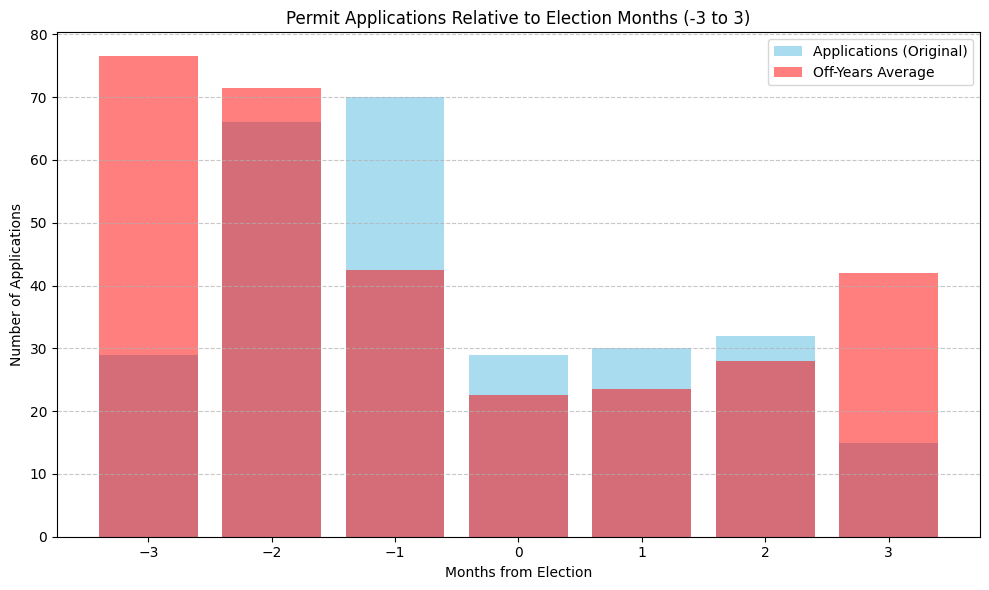

In [146]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot the original applications as a shaded background
plt.bar(x1, filtered_applications['application_count'], 
        color='skyblue', alpha=0.7, label='Applications (Original)')

# Overlay the "off-years" average as a semi-transparent bar
plt.bar(x_off_years, off_years_avg['application_count_off_years'], 
        color='red', alpha=0.5, label='Off-Years Average')

# Labels and title
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Permit Applications Relative to Election Months (-3 to 3)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


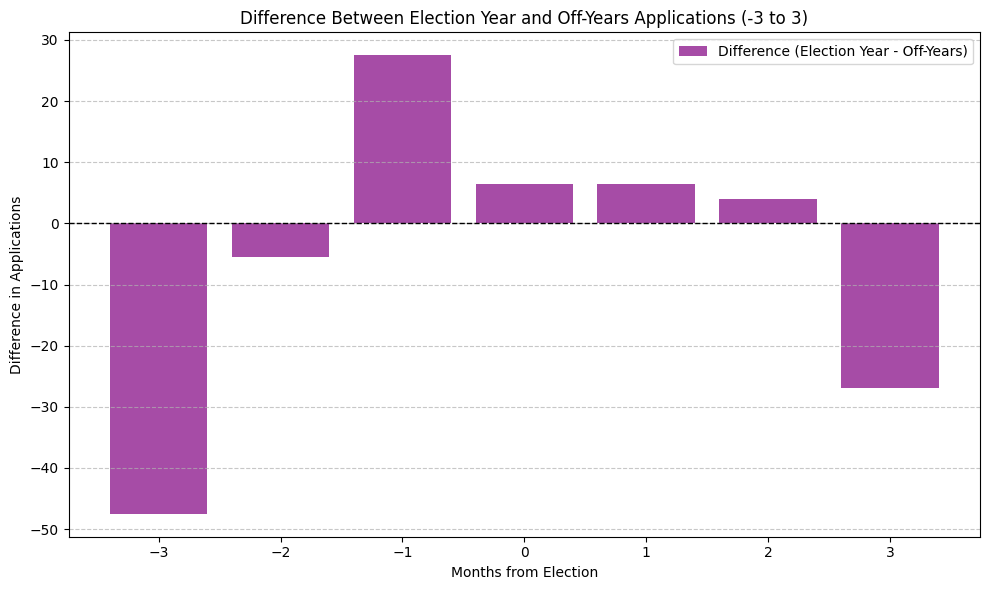

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Merge the original and off-years datasets on 'months_from_election' to compute the difference
difference_df = pd.merge(
    filtered_applications, off_years_avg, on="months_from_election"
)

# Compute the difference (Original - Off-Years)
difference_df["difference"] = difference_df["application_count"] - difference_df["application_count_off_years"]

# Define x values for plotting
x_diff = np.array(difference_df["months_from_election"])

plt.figure(figsize=(10, 6))

# Plot the difference as bars
plt.bar(x_diff, difference_df["difference"], 
        color="purple", alpha=0.7, label="Difference (Election Year - Off-Years)")

# Add a horizontal line at zero for reference
plt.axhline(0, color="black", linewidth=1, linestyle="--")

# Labels and title
plt.xlabel("Months from Election")
plt.ylabel("Difference in Applications")
plt.title("Difference Between Election Year and Off-Years Applications (-3 to 3)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
